In [61]:
from cpODEmodel import cpODEmodel
from cpODEstep import cpODEstepRK4
import matplotlib.pyplot as plt
import numpy as np

class ChemicalOscillatorModel(cpODEmodel):
    """
    A model for a chemical oscillator ODE system.
    This class defines a Lotka-Volterra-like behavior for chemical reactions.
    """
    def __init__(self, s0, p, t0):
        """
        Initialize the chemical oscillator model.

        :param array_like s0: Initial state [A, B]
        :param array_like p: Parameters [k1, k2] (reaction rates)
        :param float t0: Initial time
        """
        
        self._A = s0[0]  
        self._B = s0[1]  
        
        
        self.k1 = p[0]  
        self.k2 = p[1]  
        super().__init__(s0, p, t0)
        
    def getRate(self, t, s):
        """
        Defines the rate equations for the chemical oscillator.

        :param float t: Current time
        :param array_like s: Current state [A, B]
        :return array_like: Rates of change [dA/dt, dB/dt]
        """
        A, B = s[0], s[1]
        # Lotka-Volterra
        dA_dt = self.k1 * A - self.k2 * A * B
        dB_dt = -self.k1 * B + self.k2 * A * B
        
        return np.array([dA_dt, dB_dt])

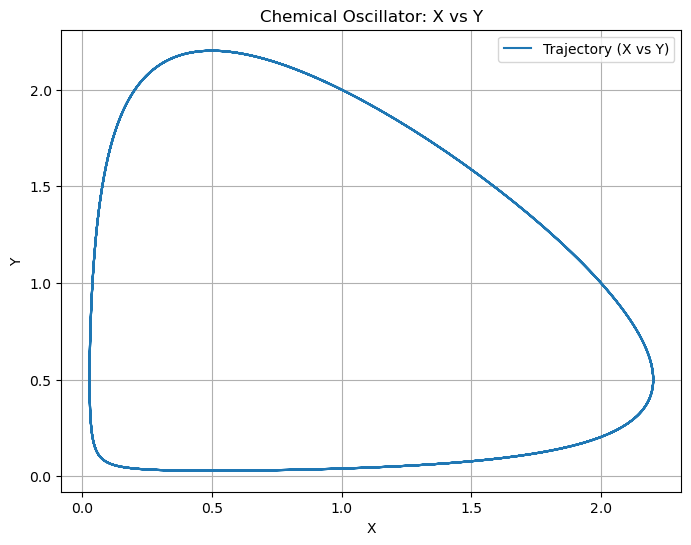

In [ ]:
def simulate_oscillator(A, B, s0, t0,h,tmax):
    model = ChemicalOscillatorModel(s0, [A,B], t0)
    stepper = cpODEstepRK4(h, model)

    times = [t0]
    X_values = [s0[0]]
    Y_values = [s0[1]]

    while model.getTime() < tmax:
        stepper.step()
        times.append(model.getTime())
        X, Y = model.getState()
        X_values.append(X)
        Y_values.append(Y)

    return X_values, Y_values
A = 1  
B = 2  
s0 = [A, B/A]
t0 = 0.0  
h = 0.01  
tmax = 50  
X_values, Y_values = simulate_oscillator(A, B, s0, t0, h, tmax)

plt.figure(figsize=(8, 6))
plt.plot(X_values, Y_values, label="Trajectory (X vs Y)")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Chemical Oscillator: X vs Y")
plt.legend()
plt.grid()
plt.show()

In [63]:
def classify_behavior(X_values, Y_values):
    xMin = min(X_values)
    xMax = max(X_values)
    yMin = min(Y_values)
    yMax = max(Y_values)

    maxDiff = xMax - yMax
    minDiff = yMin - xMin

    if (abs(maxDiff)<1e-4 and abs(minDiff)<1e-4):
        return 1 #Stable
    else:
        return 2 #Unstable


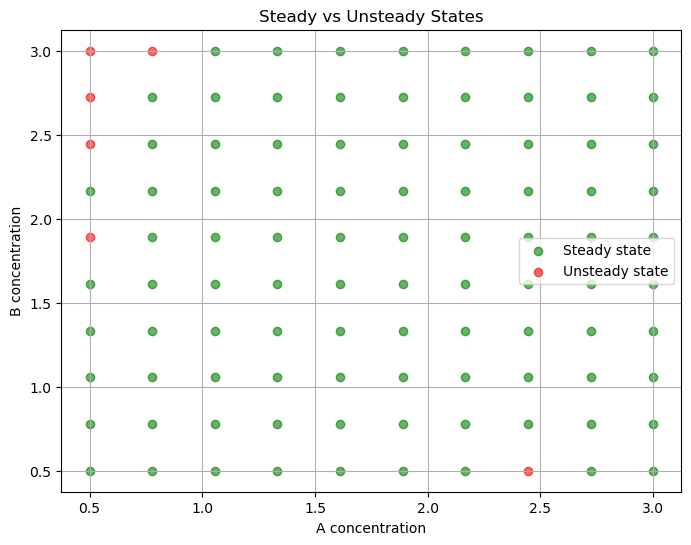

In [64]:
def generate_grid(A_range, B_range, s0, t0, h, tmax):
    A_values = np.linspace(A_range[0], A_range[1], 10) 
    B_values = np.linspace(B_range[0], B_range[1], 10)  

    steady_states = []
    unsteady_states = []

    for A in A_values:
        for B in B_values:
            s0_new = [A, B / A] 
            X_values, Y_values = simulate_oscillator(A, B, s0_new, t0, h, tmax)
            state_type = classify_behavior(X_values, Y_values)
            
            if state_type == 1:  
                steady_states.append([A, B])
            else:  
                unsteady_states.append([A, B])

    return np.array(steady_states), np.array(unsteady_states)

# params
A_range = (0.5, 3.0)  
B_range = (0.5, 3.0)  
s0 = [1, 2]  
t0 = 0.0  
h = 0.01  
tmax = 50 

steady_states, unsteady_states = generate_grid(A_range, B_range, s0, t0, h, tmax)

plt.figure(figsize=(8, 6))
plt.scatter(steady_states[:, 0], steady_states[:, 1], color='green', label="Steady state", alpha=0.6)
plt.scatter(unsteady_states[:, 0], unsteady_states[:, 1], color='red', label="Unsteady state", alpha=0.6)
plt.xlabel("A concentration")
plt.ylabel("B concentration")
plt.title("Steady vs Unsteady States")
plt.legend()
plt.grid(True)
plt.show()


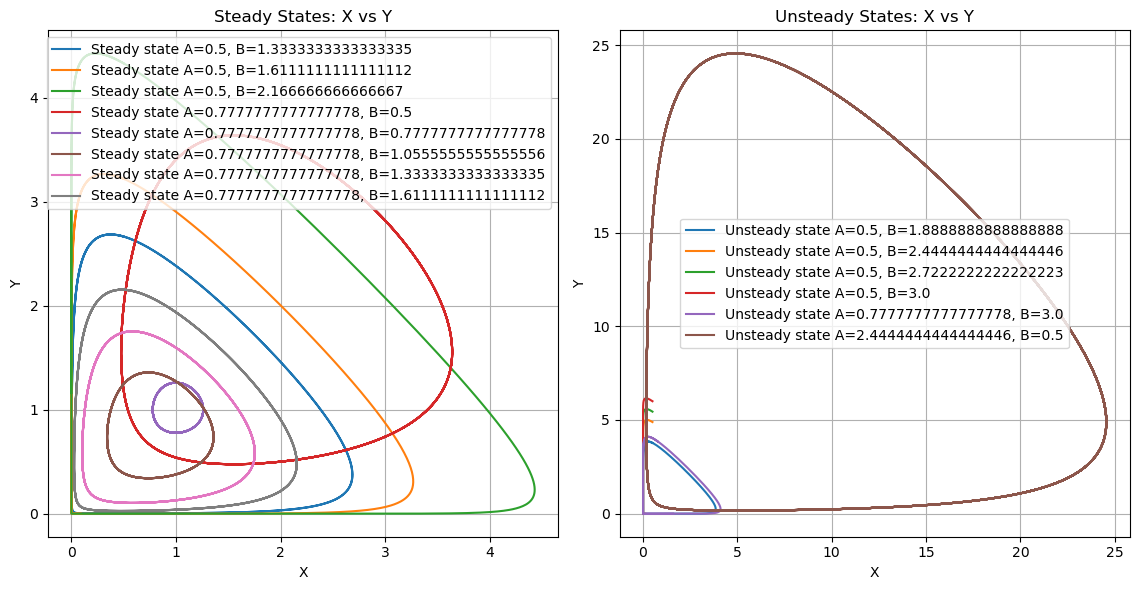

In [65]:
def plot_steady_unsteady_trajectories(steady_states, unsteady_states, s0, t0, h, tmax):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    for state in steady_states[3:11]: #truncate so not too large
        A, B = state
        s0_new = [A, B / A]
        X_values, Y_values = simulate_oscillator(A, B, s0_new, t0, h, tmax)
        plt.plot(X_values, Y_values, label=f"Steady state A={A}, B={B}")
    plt.title("Steady States: X vs Y")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.legend()

    plt.subplot(1, 2, 2)
    for state in unsteady_states:
        A, B = state
        s0_new = [A, B / A]
        X_values, Y_values = simulate_oscillator(A, B, s0_new, t0, h, tmax)
        plt.plot(X_values, Y_values, label=f"Unsteady state A={A}, B={B}")
    plt.title("Unsteady States: X vs Y")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Set parameters
A_range = (0.5, 3.0) 
B_range = (0.5, 3.0)  
s0 = [1, 1]  
t0 = 0.0  
h = 0.01  
tmax = 50  

steady_states, unsteady_states = generate_grid(A_range, B_range, s0, t0, h, tmax)
plot(steady_states, unsteady_states, s0, t0, h, tmax)
